In [10]:
from simplicial import *


G = DiGraph( [[1,2,'2'],[1,3,'3'],[2,1,'1'],[2,3,'3'],[3,1,'1'],[3,2,'2']], multiedges=True)
SS = SimplicialSystem(G, '123')

V = SS.vertex(1)

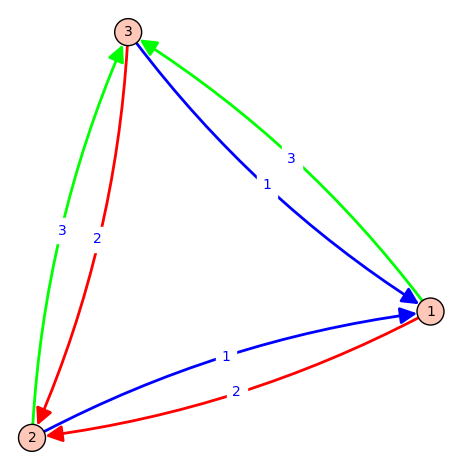

In [11]:
SS.plot()

In [17]:
n = 2
path = '321231' + '21'*n + '23123'
V.comatrix(path)

[-3 -3  4]
[ 6 -1 -3]
[-5  3  1]

In [13]:
n = 5
path = '321' 
V.comatrix(path)

[ 1  0 -1]
[-1  1  1]
[ 1 -1  0]

In [3]:
V.rauzy_matrix('21')

[1 0 0]
[0 1 0]
[1 1 1]

In [7]:
V.comatrix('23')

[ 1  0  0]
[ 1  1 -1]
[-1  0  1]

In [36]:
V.comatrix('21')

[ 1  0 -1]
[ 0  1 -1]
[ 0  0  1]

In [2]:
A = V.rauzy_matrix('21') - identity_matrix(3)

In [3]:
B = V.rauzy_matrix('31') - identity_matrix(3)

In [4]:
def E(i,j):
    M = identity_matrix(3)
    M[i,j] = 1
    return M

In [5]:
M = V.rauzy_matrix('21231')

In [22]:
rand_S = V.init_rand()


In [55]:
rand_S = V.init_rand()
path = rand_S.labels(10)
M = V.rauzy_matrix(path)
N = V.comatrix(path)
print(N)

[ 4 -1 -2]
[ 3  1 -3]
[-4  0  3]


In [77]:
for _ in range(1000):
    rand_S = V.init_rand()
    path = rand_S.labels(100)
    v = vector([1,-1,1])
    if max(abs(x) for x in v*N) != linf(N) and (min(abs(x) for x in N.list()) != 0) :
        print(min(abs(x) for x in N.coefficients()))
        print(path, N)

In [73]:
N.list()

[4, -1, -2, 3, 1, -3, -4, 0, 3]

In [37]:
for _ in range(10):
    rand_S = V.init_rand()
    path = rand_S.labels(10)
    M = V.rauzy_matrix(path)
    N = V.comatrix(path)
    print(N)

[ 0 -3  1]
[ 1  1 -1]
[-3  1  2]
[ 2  0 -5]
[ 1  1 -5]
[-3  0  8]
[ 1  0 -5]
[ 0  1 -5]
[ 0  0  1]
[ 2 -1 -2]
[-1  1  0]
[ 2 -3  3]
[ 1  1 -5]
[-1  1  0]
[ 1 -2  3]
[ 1  4 -2]
[-1  0  1]
[ 1 -3  0]
[ 2  0 -5]
[ 1  2 -7]
[-1 -1  5]
[ 1  2 -2]
[-1  0  1]
[ 1 -5  2]
[ 3  2 -3]
[-5 -3  5]
[ 3  0 -2]
[ 5 -2 -3]
[ 5  0 -4]
[-3  1  2]


In [34]:
for _ in range(1000):
    rand_S = V.init_rand()
    path = rand_S.labels(10)
    M = V.rauzy_matrix(path)
    N = V.comatrix(path)
    if 2*l_max(M) < linf(N):
        print(path, l_max(M), linf(N))

In [35]:
for i in range(10):
    path = '31'*(10^i)
    M = V.rauzy_matrix(path)
    N = V.comatrix(path)
    print (l_max(M), linf(N))

2 3
11 21
101 201
1001 2001
10001 20001


KeyboardInterrupt: 

In [19]:
def l_max(M):
    return max(sum(M[:,i].coefficients()) for i in range(M.ncols()))

def linf(M):
    return max(sum(abs(i) for i in M[:,j].coefficients()) for j in range(M.ncols()))

def l_max_ind(M):
    return max(range(M.ncols()), key= lambda i: sum(M[:,i].coefficients())) + 1

path = '21231231232123'
M = V.rauzy_matrix(path)
l_max(M), l_max_ind(M)

(49, 3)

In [18]:
V.rauzy_matrix('21')

[1 0 0]
[0 1 0]
[1 1 1]

In [7]:
V.init_rand().labels(3)

'321'

In [8]:
M = V.rauzy_matrix('2123123')
l_max(M)

8

In [9]:
M = V.comatrix('21231')

In [27]:
def linf(M):
    return max(sum(abs(i) for i in M[:,j].coefficients()) for j in range(M.ncols()))

In [11]:
C = V.rauzy_matrix('232')*E(2,1).inverse()  - identity_matrix(3)

In [12]:
show(A,B,C)

[0 0 0]
[0 0 0]
[1 1 0] [0 0 0]
[1 0 1]
[0 0 0] [0 0 1]
[0 0 0]
[0 0 0]

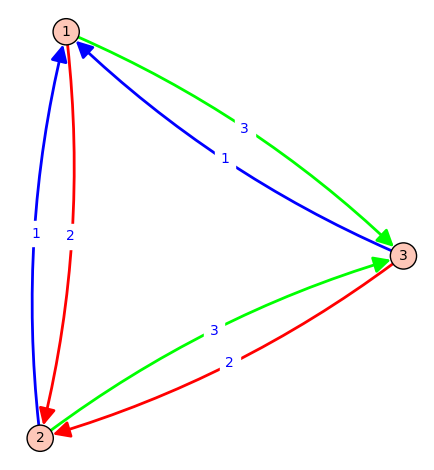

In [13]:
SS.plot()

In [3]:
P = SS.plot_cotangent(100000,n_min=500,save='Selmer',frame=True, size=1)

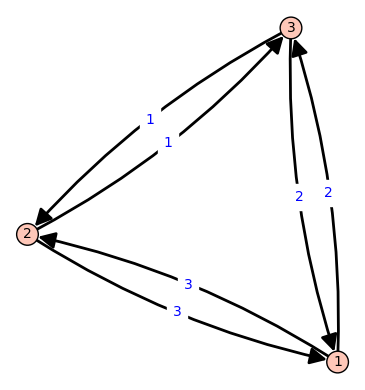

In [4]:
SS.dual().G.show(edge_labels=True)

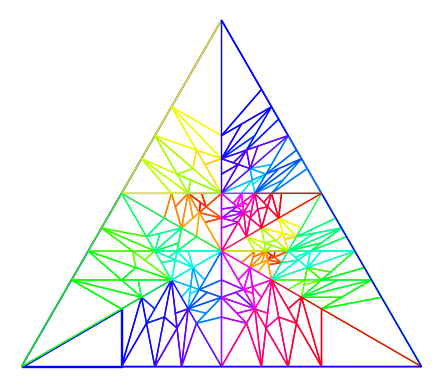

In [2]:
n = 7

SS.pos = str([1,2,3])
T1 = identity_matrix(3)
T1[1,2]=1
G1 = SS.decompose_simplex(n, leg=False, fill=False, T=T1)
SS.pos = str([1,3,2])
T2 = T1.transpose()
G2 = SS.decompose_simplex(n, leg=False, fill=False, T=T2)
G1 + G2

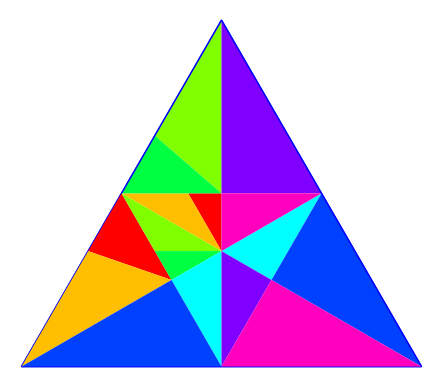

In [3]:
n = 3

SS.pos = str([2,3,1])
T1 = identity_matrix(3)
T1[2,0]=1
G1 = SS.decompose_simplex(3, leg=False, T=T1)
SS.pos = str([2,1,3])
T2 = T1.transpose()
G2 = SS.decompose_simplex(3, leg=False,T=T2)
G1 + G2

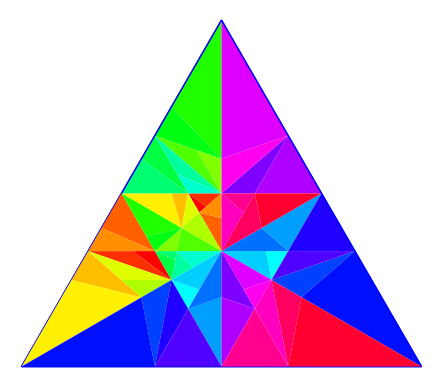

In [4]:
n = 5

SS.pos = str([2,3,1])
T1 = identity_matrix(3)
T1[2,0]=1
G1 = SS.decompose_simplex(n, leg=False, T=T1)
SS.pos = str([2,1,3])
T2 = T1.transpose()
G2 = SS.decompose_simplex(n, leg=False,T=T2)
G1 + G2

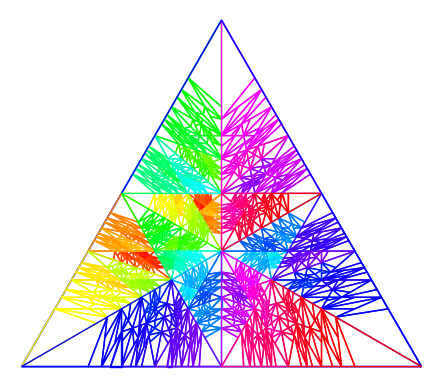

In [11]:
n = 10

SS.pos = str([2,3,1])
T1 = identity_matrix(3)
T1[2,0]=1
G1 = SS.decompose_simplex(n, leg=False, fill=False, T=T1)
SS.pos = str([2,1,3])
T2 = T1.transpose()
G2 = SS.decompose_simplex(n, leg=False, fill=False, T=T2)
G1 + G2